In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"

# نقرأ الملف مباشرة من الموقع (مضغوط gzip)
df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'], low_memory=False)

print(df.shape)
df.head()



(48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
# الإحصاءات العامة
print("\n🔹 إحصاءات عامة:")
print(df.describe(include='all'))



🔹 إحصاءات عامة:
          holiday          temp       rain_1h       snow_1h    clouds_all  \
count          61  48204.000000  48204.000000  48204.000000  48204.000000   
unique         11           NaN           NaN           NaN           NaN   
top     Labor Day           NaN           NaN           NaN           NaN   
freq            7           NaN           NaN           NaN           NaN   
mean          NaN    281.205870      0.334264      0.000222     49.362231   
min           NaN      0.000000      0.000000      0.000000      0.000000   
25%           NaN    272.160000      0.000000      0.000000      1.000000   
50%           NaN    282.450000      0.000000      0.000000     64.000000   
75%           NaN    291.806000      0.000000      0.000000     90.000000   
max           NaN    310.070000   9831.300000      0.510000    100.000000   
std           NaN     13.338232     44.789133      0.008168     39.015750   

       weather_main weather_description                   

In [ ]:
mean_traffic = df['traffic_volume'].mean()
median_traffic = df['traffic_volume'].median()
mode_traffic = df['traffic_volume'].mode()[0]
range_traffic = df['traffic_volume'].max() - df['traffic_volume'].min()

print("\n🔸 المتوسط:", mean_traffic)
print("🔸 الوسيط:", median_traffic)
print("🔸 المنوال:", mode_traffic)
print("🔸 المدى:", range_traffic)



🔸 المتوسط: 3259.8183553232097
🔸 الوسيط: 3380.0
🔸 المنوال: 353
🔸 المدى: 7280


In [ ]:
skewness = df['traffic_volume'].skew()
kurtosis = df['traffic_volume'].kurtosis()

print("\n📊 الالتواء (Skewness):", skewness)
print("📊 التفلطح (Kurtosis):", kurtosis)



📊 الالتواء (Skewness): -0.08938135143647916
📊 التفلطح (Kurtosis): -1.3090882117269556


In [ ]:
group_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values('mean', ascending=False)
print("\n🔹 المتوسط والانحراف المعياري حسب حالة الطقس:")
print(group_stats)



🔹 المتوسط والانحراف المعياري حسب حالة الطقس:
                     mean          std
weather_main                          
Clouds        3618.449749  1906.202879
Haze          3502.101471  1873.511057
Rain          3317.905501  1982.228705
Drizzle       3290.727073  1997.901830
Smoke         3237.650000  1978.015893
Clear         3055.908819  1987.101411
Snow          3016.844228  1900.185883
Thunderstorm  3001.620890  1988.296012
Mist          2932.956639  2073.025670
Fog           2703.720395  2125.525863
Squall        2061.750000  1950.070490


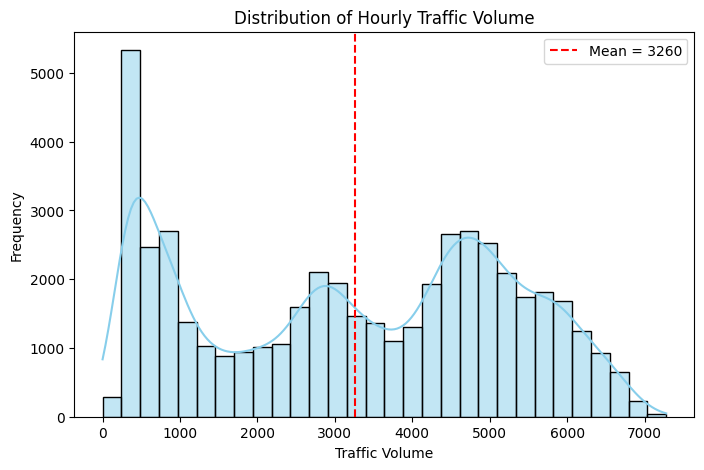

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_traffic, color='red', linestyle='--', label=f"Mean = {mean_traffic:.0f}")
plt.title("Distribution of Hourly Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.legend()
plt.show()


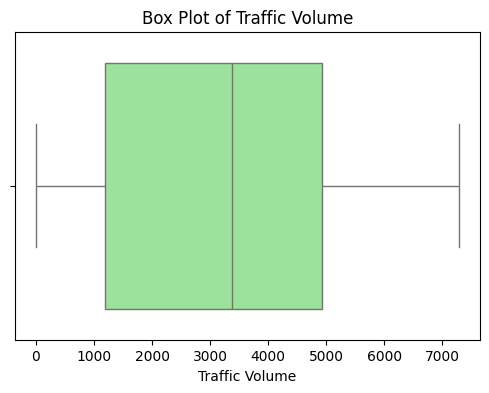


📦 Interquartile Range (IQR): 3740.0


In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['traffic_volume'], color='lightgreen')
plt.title("Box Plot of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.show()

# حساب IQR (Interquartile Range)
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
print("\n📦 Interquartile Range (IQR):", IQR)


/tmp/ipython-input-3092213988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Set2')


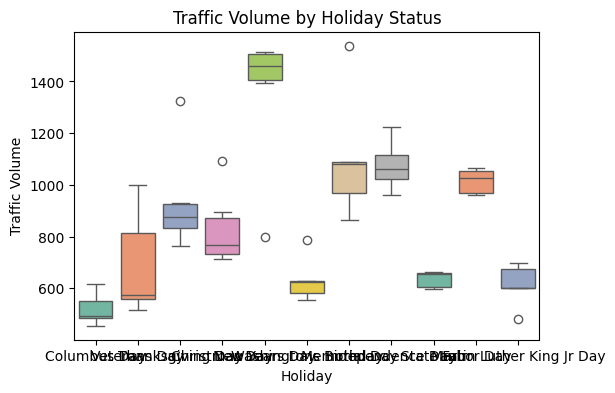

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Set2')
plt.title("Traffic Volume by Holiday Status")
plt.xlabel("Holiday")
plt.ylabel("Traffic Volume")
plt.show()


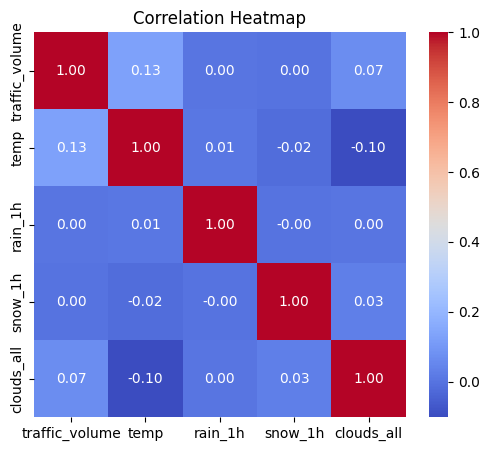


🔹 أقوى ارتباط مع traffic_volume هو مع: temp
قيمة الارتباط: 0.1302987981711253


In [ ]:
corr = df[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr_target = corr['traffic_volume'].drop('traffic_volume')
strongest = corr_target.abs().idxmax()
print("\n🔹 أقوى ارتباط مع traffic_volume هو مع:", strongest)
print("قيمة الارتباط:", corr_target[strongest])


In [ ]:
try:
    import plotly.express as px
    fig = px.scatter(df, x='temp', y='traffic_volume',
                     color='weather_main',
                     hover_data=['date_time', 'holiday'],
                     title='Traffic Volume vs Temperature (Interactive)')
    fig.show()
except:
    print("\n⚠️ مكتبة Plotly غير مثبّتة — يمكنك تثبيتها بالأمر:\n!pip install plotly")
